<a href="https://colab.research.google.com/github/osmarbraz/exemplos_GPT2/blob/main/ExemplosInspecionado_Vocabulario_GPT2_pt_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inpecionando o Vocabulário do GPT-2 em português(pt-br) usando Transformers by HuggingFace

Usando transformers

https://huggingface.co/gpt2

Modelo pré treinado em português
Link dos arquivos do modelo pt-br GPT-2

https://huggingface.co/pierreguillou/gpt2-small-portuguese

Lista dos modelos:
https://huggingface.co/models

**Link biblioteca Huggingface:**
https://github.com/huggingface/transformers

# 0 - Preparação do ambiente
Preparação do ambiente para execução do exemplo.

## Tratamento de logs

Método para tratamento dos logs.

In [ ]:
# Biblioteca de logging
import logging

# Formatando a mensagem de logging
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

## Identificando o ambiente Colab

Cria uma variável para identificar que o notebook está sendo executado no Google Colaboratory.

In [ ]:
# Se estiver executando no Google Colaboratory
import sys

# Retorna true ou false se estiver no Google Colaboratory
IN_COLAB = "google.colab" in sys.modules

# 1 - Instalação Transformer da Hugging Face

Instala a interface pytorch para o BERT by Hugging Face. 

In [ ]:
# Instala a última versão da biblioteca
!pip install transformers

# Instala uma versão específica da biblioteca
# !pip install -U transformers==4.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 6.7 MB/s 
     |████████████████████████████████| 7.6 MB 52.2 MB/s 
     |████████████████████████████████| 182 kB 54.1 MB/s 


# 2-Carregando o GPT-2

Lista dos modelos:
  - https://huggingface.co/models?language=pt&sort=downloads&search=gpt2

In [ ]:
modelo_gpt2 = "pierreguillou/gpt2-small-portuguese"

## 2.1 Carrega o tokenizador(GPT2Tokenizer)

Carregando o **tokenizador** da comunidade.

In [ ]:
# Importando as bibliotecas do Modelo e do Tokenizador
from transformers import GPT2Tokenizer

# Carregando o Tokenizador da comunidade
print('Carregando o tokenizador GPT-2 da comunidade...')

tokenizer = GPT2Tokenizer.from_pretrained(modelo_gpt2)  

Carregando o tokenizador GPT-2 da comunidade...


Downloading:   0%|          | 0.00/850k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/508k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/120 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

## 2.2 - Carregando o Modelo GPT-2(GPT2Model)

Carregando o **modelo** da comunidade.

In [ ]:
# Importando as bibliotecas do Modelo e do Tokenizador
from transformers import GPT2Model

# Carregando o Modelo da comunidade
print('Carregando o modelo GPT-2 da comunidade...')

model = GPT2Model.from_pretrained(modelo_gpt2)    

Carregando o modelo GPT-2 da comunidade...


Downloading:   0%|          | 0.00/510M [00:00<?, ?B/s]

Some weights of the model checkpoint at pierreguillou/gpt2-small-portuguese were not used when initializing GPT2Model: ['lm_head.weight']
- This IS expected if you are initializing GPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 2.3 - Inspecionando Vocabulário GPT-2


In [ ]:
print("O comprimento máximo do modelo é {} para este modelo, embora o tamanho de incorporação real para GPT pequeno seja 768".format(tokenizer.model_max_length))
print("O token de início da sequência {} token tem o id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.bos_token_id), tokenizer.bos_token_id))
print("O token de fim de sequência {} tem o id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.eos_token_id), tokenizer.eos_token_id))
print("O token de preenchimento {} tem o id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.pad_token_id), tokenizer.pad_token_id))

O comprimento máximo do modelo é 1000000000000000019884624838656 para este modelo, embora o tamanho de incorporação real para GPT pequeno seja 768
O token de início da sequência <|endoftext|> token tem o id 0
O token de fim de sequência <|endoftext|> tem o id 0
O token de preenchimento <|endoftext|> tem o id 0


### Tamanho do vocabulário

In [ ]:
print(len(list(tokenizer.encoder.keys())))

50257


In [ ]:
print(tokenizer.vocab_size)

50257


In [ ]:
print(tokenizer.vocab_files_names)

{'vocab_file': 'vocab.json', 'merges_file': 'merges.txt'}


### Descarregar Vocabulário
--------------

Recupere a lista inteira de "tokens" e escreva em  um arquivo texto para que possamos examiná-los.

In [ ]:
with open("vocabulario.txt", 'w') as f:
    
    # Para cada token...    
    for token in list(tokenizer.encoder.keys()):
        
        # Escreve ele na saída com um caracter de escape unicode.            
        f.write(token + '\n')

Ao ler o vocabulário, estou vendo o seguinte:

* Os primeiros 99 tokens (indexados 1) parecem estar reservados e a maioria possui o formato [unused957].
     * 1 - <|endoftext|>
    


### Characteres único
---------------------

A célula a seguir itera sobre o vocabulário, guardando todos os tokens de caractere único.

In [ ]:
one_chars = []
one_chars_hashes = []

# Para cada token no vocabulário...
for token in list(tokenizer.encoder.keys()):
        
    # Grava qualquer token com um simples caracter.
    if len(token) == 1:
        one_chars.append(token)
        
    # Grava tokens de caractere único precedidos de dois hash.    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)

print(len(one_chars))
print(len(one_chars_hashes))

256
0


In [ ]:
print('Número de tokens de um único caractere:', len(one_chars), '\n')

# Imprime todos os caracteres únicos, 40 por linha.

# Para cada batch de 40 tokens...
for i in range(0, len(one_chars), 40):
        
    # Limita o índice final para que não ultrapassem o final da lista.
    end = min(i + 40, len(one_chars) + 1)
        
    # Imprime os tokens, separados por um espaço
    print(' '.join(one_chars[i:end]))

Número de tokens de um único caractere: 256 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ A B C D E F G H
I J K L M N O P Q R S T U V W X Y Z [ \ ] ^ _ ` a b c d e f g h i j k l m n o p
q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ® ¯ ° ± ² ³ ´ µ ¶ · ¸ ¹ º »
¼ ½ ¾ ¿ À Á Â Ã Ä Å Æ Ç È É Ê Ë Ì Í Î Ï Ð Ñ Ò Ó Ô Õ Ö × Ø Ù Ú Û Ü Ý Þ ß à á â ã
ä å æ ç è é ê ë ì í î ï ð ñ ò ó ô õ ö ÷ ø ù ú û ü ý þ ÿ Ā ā Ă ă Ą ą Ć ć Ĉ ĉ Ċ ċ
Č č Ď ď Đ đ Ē ē Ĕ ĕ Ė ė Ę ę Ě ě Ĝ ĝ Ğ ğ Ġ ġ Ģ ģ Ĥ ĥ Ħ ħ Ĩ ĩ Ī ī Ĭ ĭ Į į İ ı Ĳ ĳ
Ĵ ĵ Ķ ķ ĸ Ĺ ĺ Ļ ļ Ľ ľ Ŀ ŀ Ł ł Ń


In [ ]:
print('Número de tokens de um único caractere com hashes:', len(one_chars_hashes), '\n')

# Imprime todos os caracteres únicos, 40 por linha.

# Remova as marcas de hash, uma vez que elas apenas bagunçam a tela.
tokens = [token.replace('##', '') for token in one_chars_hashes]

# Para cada batch de 40 tokens...
for i in range(0, len(tokens), 40):
    
    # Limita o índice final para que não ultrapassem o final da lista.
    end = min(i + 40, len(tokens) + 1)
    
    # Imprime os tokens, separados por um espaço
    print(' '.join(tokens[i:end]))

Número de tokens de um único caractere com hashes: 0 



In [ ]:
print('Are the two sets identical?', set(one_chars) == set(tokens))

Are the two sets identical? False


### Subpalavras vs. palavras inteiras

Vamos reunir algumas estatísticas sobre o vocabulário.



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Maximum token length: 24


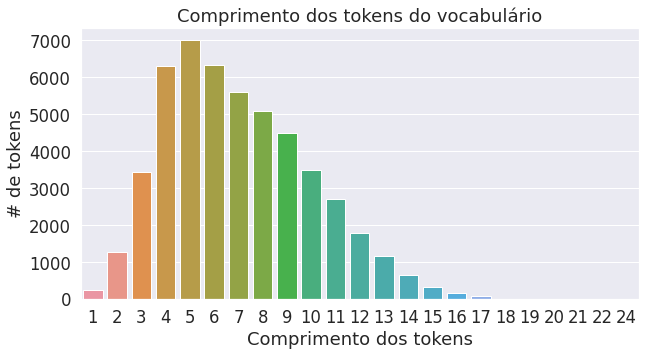

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumente o tamanho do gráfico e o tamanho da fonte.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Medida do comprimento de cada token no vocabulário.
token_lengths = [len(token) for token in list(tokenizer.encoder.keys())]

# Plota o número de tokens pr cada tamanho.
sns.countplot(token_lengths)
plt.title('Comprimento dos tokens do vocabulário')
plt.xlabel('Comprimento dos tokens')
plt.ylabel('# de tokens')

print('Maximum token length:', max(token_lengths))

### Erros ortográficos

In [ ]:
'crescer' in list(tokenizer.encoder.keys()) # Correto

False

In [ ]:
'crecer' in list(tokenizer.encoder.keys()) # Errado

False

In [ ]:
'governo' in list(tokenizer.encoder.keys()) # Correto

True

In [ ]:
'gorverno' in list(tokenizer.encoder.keys()) # Errado

False

In [ ]:
'inicio' in list(tokenizer.encoder.keys()) # Correto

False

In [ ]:
'inisio' in list(tokenizer.encoder.keys()) # Errado

False

In [ ]:
'separado' in list(tokenizer.encoder.keys()) # Correto

False

In [ ]:
'seperado' in list(tokenizer.encoder.keys()) # Errado

False

E as contrações?

In [ ]:
"você" in list(tokenizer.encoder.keys()) # Correto

False

In [ ]:
"vc" in list(tokenizer.encoder.keys()) # Errado

False

### Início versus subpalavras médias

Para caracteres únicos, existe o caractere individual e a versão '##' para cada caractere. O mesmo vale para subpalavras?

In [ ]:
# Para cada token no vocabulário...
for token in list(tokenizer.encoder.keys()):
    # Se ela é uma subpalavras...
    if len(token) >= 2 and token[0:2] == '##':
        if not token[2:] in tokenizer.vocab:
            print('Did not find a token for', token[2:])
            break

In [ ]:
'##te' in list(tokenizer.encoder.keys())

False

In [ ]:
'te' in list(tokenizer.encoder.keys())

True

### Nomes



In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b63bcbb2f4976f1e2252d6d664b8a4ccc4a06d4f295111ecfe657f44a9000ec3
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
import wget
import random 

print('Beginning file download with wget module')

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')


Beginning file download with wget module


'first-names.txt'

In [ ]:
# Leia-os no.
with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

names = []

# Decodifique os nomes, converta em minúsculas e retire as novas linhas.
for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print('Número de nomes: {:,}'.format(len(names)))
print('Exemplo:', random.choice(names))


Número de nomes: 21,985
Exemplo: brit


In [ ]:
num_names = 0

# Para cada nome da lista...
for name in names:

    # Se ela está no vocabulário...
    if name in list(tokenizer.encoder.keys()):
        # Conta ela.
        num_names += 1

print('{:,} nomes no vocabulário'.format(num_names))

1,075 nomes no vocabulário


**Mais pesquisa**

* Adicione nomes mais modernos
     * Este repositório / arquivo contém alguns nomes mais modernos. O download do arquivo não está funcionando, no entanto.
     * `https://raw.githubusercontent.com/arineng/arincli/master/lib/nome-do-primeiro-nome.txt'

* Adicione nomes comuns de outros idiomas.


### Números

In [ ]:
# Conte quantos números existem no vocabulário.
count = 0

# Para cada token no vocabulário...
for token in list(tokenizer.encoder.keys()):

    # Conta ele é um número.
    if token.isdigit():
        count += 1
        
        # Qualquer número >= 10,000?
        if len(token) > 4:
            print(token)

print('Vocabulário incluí {:,} números.'.format(count))

Vocabulário incluí 325 números.


In [ ]:
# Conta quantas datas entre 1600 e 2021 estão incluídas.
count = 0 
for i in range(1600, 2021):
    if str(i) in list(tokenizer.encoder.keys()):
        count += 1

print('Vocabulário inclui {:,} de 421 datas de 1600 - 2021'.format(count))

Vocabulário inclui 149 de 421 datas de 1600 - 2021
